In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px black solid;
    color: black;
}

### Data and Library import

In [2]:
#import packages
import pandas as pd
import numpy as np
np.warnings.filterwarnings('ignore')

In [3]:
#to plot within notebook
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

In [4]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [5]:
#read the file
df = pd.read_csv('netflix_stock_data.csv')

In [6]:
#print the head
df.head()

,Date,Open,High,Low,Close,Volume
0,12/16/2015,119.800003,123.000000,118.089996,122.639999,13181000
1,12/17/2015,123.970001,126.349998,122.419998,122.510002,17284900
2,12/18/2015,120.849998,122.190002,117.919998,118.019997,17948100
3,12/21/2015,119.510002,119.589996,115.660004,116.629997,11670000
4,12/22/2015,117.300003,117.430000,114.860001,116.239998,9689000


In [7]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%m/%d/%Y')
df.index = df['Date']

In [8]:
#sorting
df = df.sort_index(ascending=True, axis=0)

In [9]:
df.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2015-12-16,2015-12-16,119.800003,123.000000,118.089996,122.639999,13181000
2015-12-17,2015-12-17,123.970001,126.349998,122.419998,122.510002,17284900
2015-12-18,2015-12-18,120.849998,122.190002,117.919998,118.019997,17948100
2015-12-21,2015-12-21,119.510002,119.589996,115.660004,116.629997,11670000
2015-12-22,2015-12-22,117.300003,117.430000,114.860001,116.239998,9689000


Text(0, 0.5, 'Price')

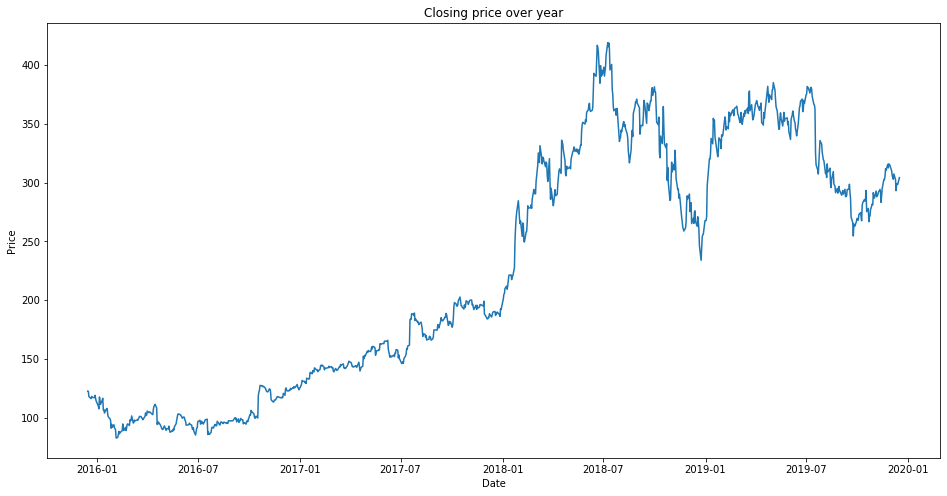

In [10]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.title('Closing price over year')
plt.xlabel('Date')
plt.ylabel('Price')

### Creating new feature

In [11]:
df["Month"] = df["Date"].dt.month

In [12]:
df["Day"] = df["Date"].dt.day

In [13]:
data = df[["Month","Day","Open","High","Low","Volume","Close"]]

In [14]:
data.head()

,Month,Day,Open,High,Low,Volume,Close
Date,,,,,,,
2015-12-16,12,16,119.800003,123.000000,118.089996,13181000,122.639999
2015-12-17,12,17,123.970001,126.349998,122.419998,17284900,122.510002
2015-12-18,12,18,120.849998,122.190002,117.919998,17948100,118.019997
2015-12-21,12,21,119.510002,119.589996,115.660004,11670000,116.629997
2015-12-22,12,22,117.300003,117.430000,114.860001,9689000,116.239998


### Spliting data

In [15]:
#split into train and validation
train = data[:700]
valid = data[700:]

In [16]:
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

In [17]:
from sklearn import metrics

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

### Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
lr_pred = lr.predict(x_valid)

In [23]:
lr_rms = np.sqrt(metrics.mean_squared_error(y_valid,lr_pred))

In [24]:
lr_rms

2.9104036541141842

Text(0, 0.5, 'Price')

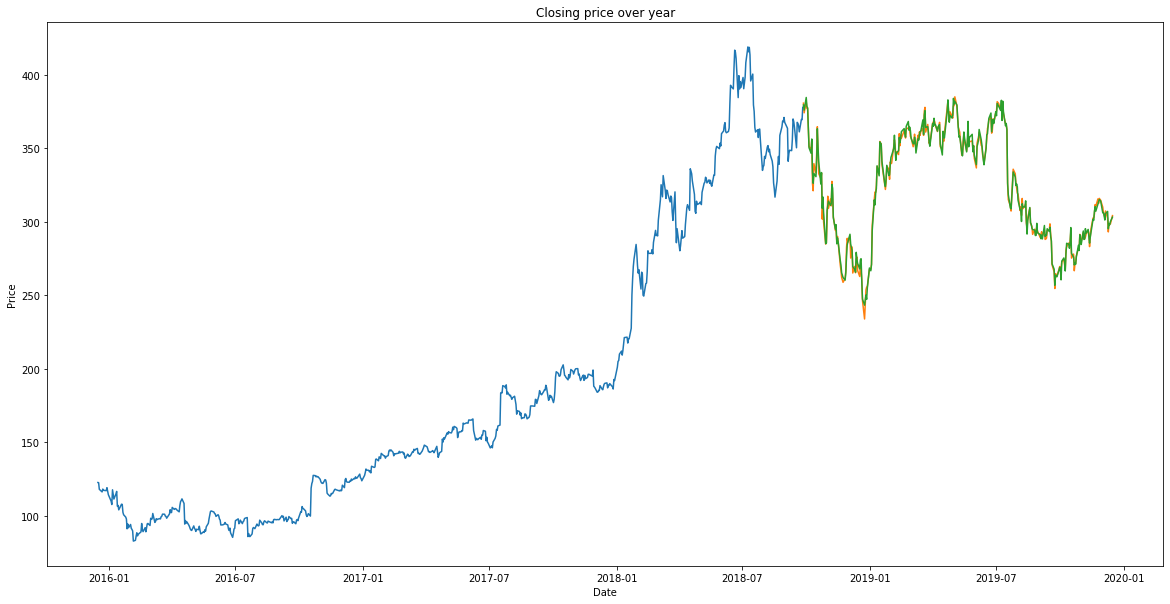

In [25]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = lr_pred

valid.index = data[700:].index
train.index = data[:700].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.title('Closing price over year')
plt.xlabel('Date')
plt.ylabel('Price')

### KNN

In [26]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

In [27]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

In [28]:
#fit the model and make predictions
model.fit(x_train,y_train)
knn_pred = model.predict(x_valid)

In [29]:
knn_rms = np.sqrt(metrics.mean_squared_error(y_valid,knn_pred))

In [30]:
knn_rms

148.5532685277281

Text(0, 0.5, 'Price')

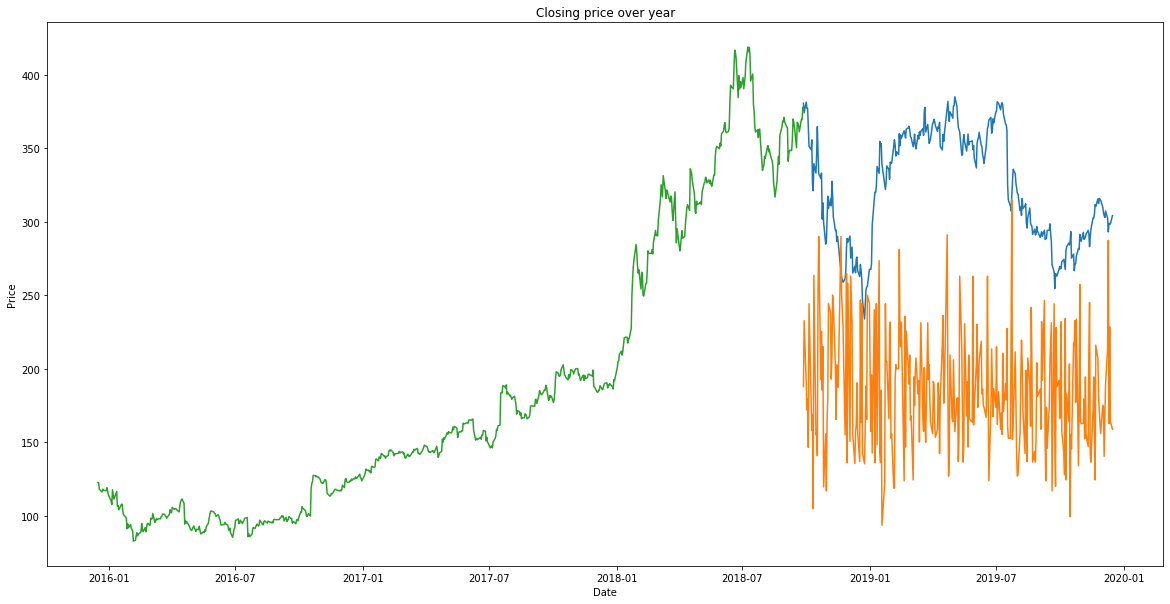

In [31]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = knn_pred
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])
plt.title('Closing price over year')
plt.xlabel('Date')
plt.ylabel('Price')

## LSTM

In [32]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [33]:
#creating dataframe
df = df.sort_index(ascending=True, axis=0)
data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(df)):
    data['Date'][i] = df['Date'][i]
    data['Close'][i] = df['Close'][i]

In [34]:
#setting index
data.index = data.Date
data.drop('Date', axis=1, inplace=True)

In [35]:
#creating train and test sets
dataset = data.values

In [36]:
train = dataset[0:700,:]
valid = dataset[700:,:]

In [37]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [38]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [39]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [40]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [41]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 91s - loss: 0.0043


In [42]:
#predicting 246 values, using past 60 from the train data
inputs = data[len(data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [43]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [44]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
lstm_pred = model.predict(X_test)
lstm_pred = scaler.inverse_transform(lstm_pred)

In [45]:
lstm_rms = np.sqrt(metrics.mean_squared_error(valid,lstm_pred))

In [46]:
lstm_rms

19.705788511871038

Text(0, 0.5, 'Price')

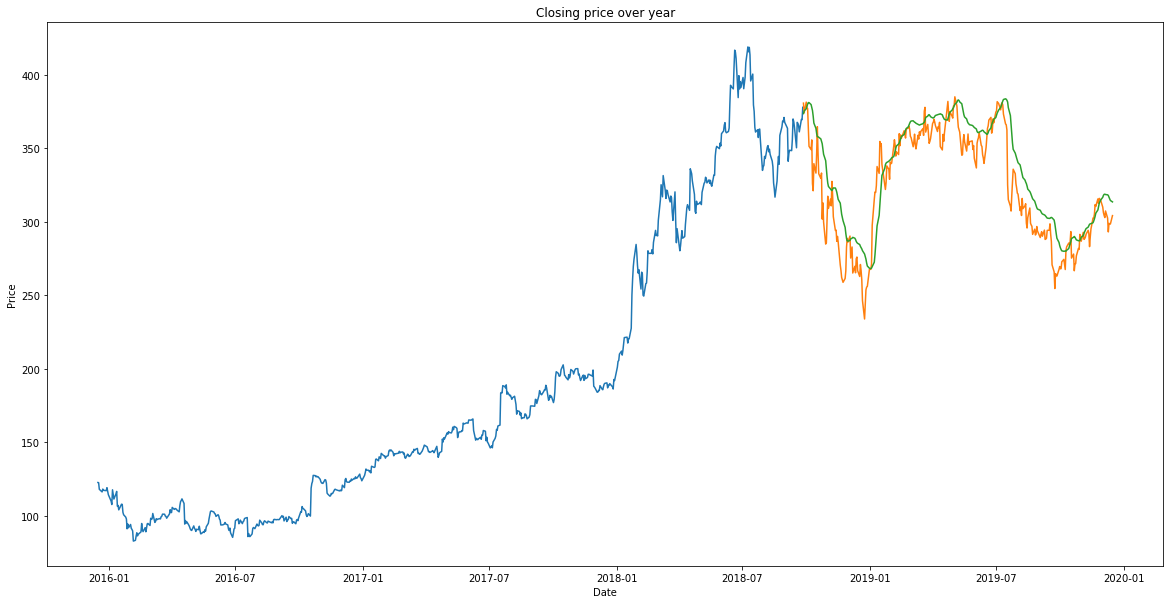

In [47]:
#for plotting
train = data[:700]
valid = data[700:]
valid['Predictions'] = lstm_pred
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.title('Closing price over year')
plt.xlabel('Date')
plt.ylabel('Price')